In [3]:
%run data_formatting.ipynb

In [4]:
# Print the counts
print("number of tags: ", len(set([item for sublist in df.tags for item in sublist])))

number of tags:  2042


In [5]:
#Print the variables of the dataset
print("dataset variables: ", df.columns.tolist())

dataset variables:  ['name', 'transcript', 'locations', 'biography', 'interview_date', 'interview_locations', 'collections', 'subjects', 'tags']


In [6]:
df.head()

,name,transcript,locations,biography,interview_date,interview_locations,collections,subjects,tags
0,Inge-Juliana Sackmann Christy,"Cindy Kelly: This is Wednesday, March 20. Inge...",[Los Alamos],Inge-Juliana Sackmann Christy is a physicist a...,"March 20, 2019",[Pasadena],[Atomic Heritage Foundation],"[European Refugees, German Atomic Bomb Program...","[Beatrice Tinsley, Caltech, Carl Friedrich Von..."
1,Tom Foulds,"Trisha Pritikin: Okay. It is January 15th, 20...",[Hanford],Tom Foulds is an attorney who represented plai...,"January 15, 2019",[Lynnwood],[Atomic Heritage Foundation],"[Environmental Impact, Health Issues, Safety]","[Cancer, Cold War, Department of Energy, Downw..."
2,Richard Eymann,Karen Dorn Steele: Our second interview is wit...,[Hanford],Richard Eymann is a founding partner and lead ...,"April 29, 2019",[Spokane],[Atomic Heritage Foundation],"[Cold War, Environmental Impact, Health Issues...","[Columbia River, Department of Energy, Downwin..."
3,Bob Cook,"Karen Dorn Steele: It’s April 29, 2019. Our fi...",[Hanford],Bob Cook is a nuclear engineer. In this interv...,"April 29, 2019",[Hanford],[Atomic Heritage Foundation],"[Environmental Impact, Health Issues, Native A...","[American Indian, Basalt Waste Isolation Proje..."
4,George Warren Reed,[The Atomic Heritage Foundation is very gratef...,[Chicago Met Lab],George Warren Reed (1920-2015) was a chemist a...,"November 11, 2006",[Chicago],[Atomic Heritage Foundation],"[African-Americans, Civilian Life]",[“Our Man in Havana.” National Resource Counci...


In [10]:
# Use explode() to create a new DataFrame with one row for each city
location_df = df.explode('locations')

# Use value_counts() to count the frequency of each city
counts = location_df['locations'].value_counts()
print(counts)

locations
Los Alamos                            202
Oak Ridge                             151
Hanford                               149
Chicago Met Lab                       108
Trinity Site                           62
Santa Fe                               59
University of California               53
Washington                             42
Manhattan                              40
Y-12 Plant                             36
B Reactor/100 Area                     35
K-25 Plant                             34
Tinian Island                          30
Columbia University                    27
Wendover Air Field                     21
Princeton University                   19
Marshall Islands                       18
Cambridge                              17
X-10 Graphite Reactor                  16
Hiroshima Mission                      14
Wilmington                             13
Jackson Square                         11
T-Plant/200 Areas                      11
Nagasaki Mission        

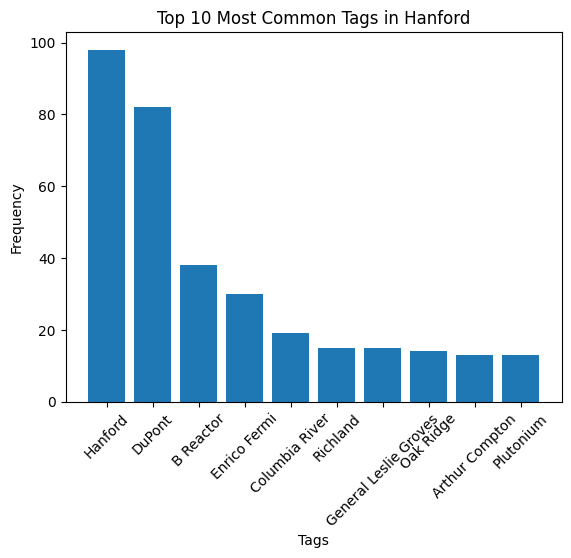

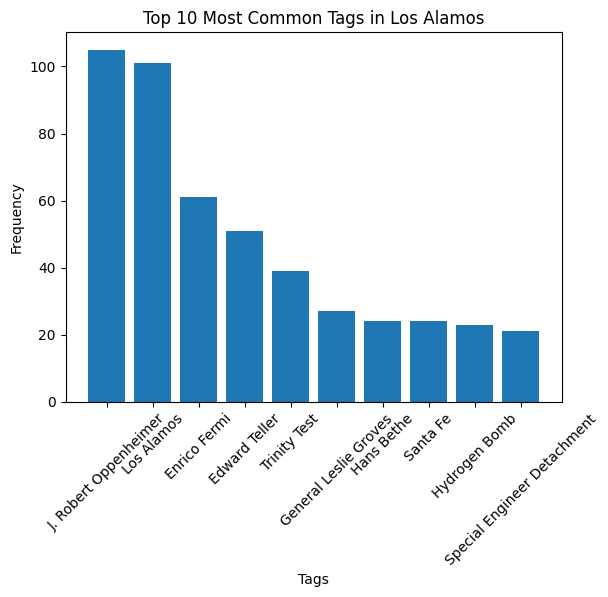

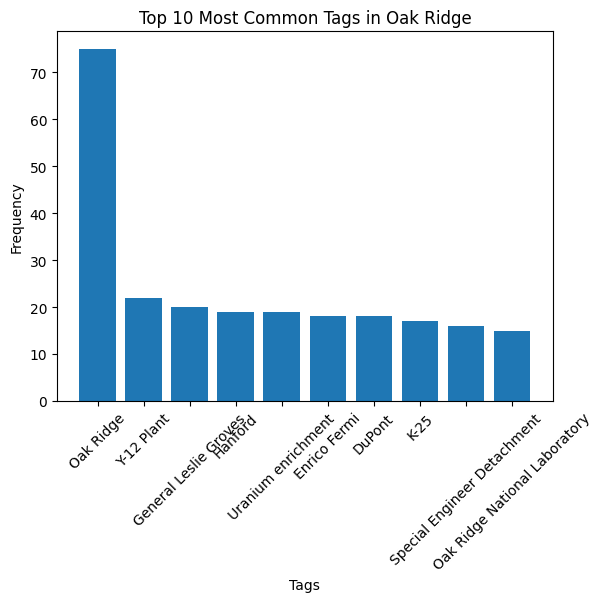

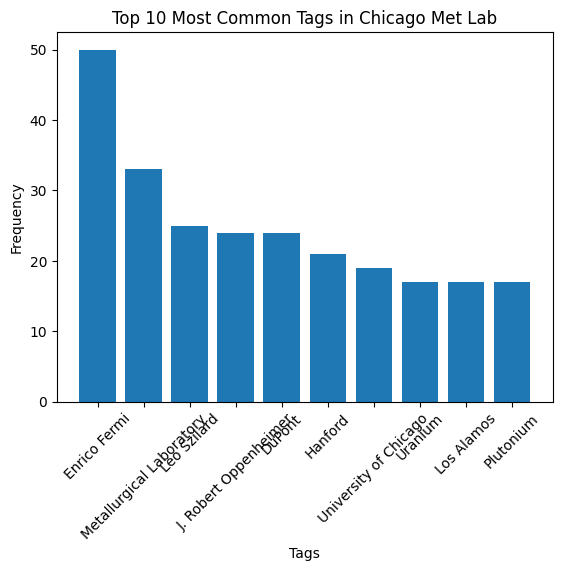

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize a dictionary to store tags for each location
location_tags = {}

# Iterate through the DataFrame and accumulate tags for each location
for _, row in df.iterrows():
    for location in row["locations"]:
        if location not in location_tags:
            location_tags[location] = []
        location_tags[location].extend(row["tags"])

def plot_most_common_tags(location, tags, n):
    count = Counter(tags).most_common(n)
    tags, frequencies = zip(*count)

    plt.bar(tags, frequencies)
    plt.xlabel("Tags")
    plt.ylabel("Frequency")
    plt.title(f"Top {n} Most Common Tags in {location}")
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()

# Create a bar plot for each location showing the frequencies of the 5 most common tags
#for location, tags in location_tags.items():
    #plot_most_common_tags(location, tags, n=5)

plot_most_common_tags("Hanford", location_tags["Hanford"], n=10)
plot_most_common_tags("Los Alamos", location_tags["Los Alamos"], n=10)
plot_most_common_tags("Oak Ridge", location_tags["Oak Ridge"], n=10)
plot_most_common_tags("Chicago Met Lab", location_tags["Chicago Met Lab"], n=10)